In [161]:
#----------------------------------------------------
# template the read and plot a wav file, and convert
# it to a floating point numpy array
#
# Alex Szalay, Baltimore, 2020-04-02
#-------------------------------------------------------
import os
import numpy as np
import matplotlib.pyplot as plt
import wave

In [190]:
def readwavefile(filename):
  """
  Reads a WAV file and returns all the frames converted to floats and the framerate.
  """
  assert os.path.exists(filename) and os.path.isfile(filename)
  wavefile = wave.open(filename, 'r')
  nframes = wavefile.getnframes()
  framerate = wavefile.getframerate()
  datatype = None
  # Zero converter!
  fconverter = lambda a : a
  if wavefile.getsampwidth() == 1:
      # 8-Bit format is unsigned.
      datatype = np.uint8
      fconverter = lambda a : ((a / 255.0) - 0.5) * 2
  elif wavefile.getsampwidth() == 2:
      # 16-Bit format is signed.
      datatype = np.int16
      fconverter = lambda a : a / 32767.0
  # Read and convert to float array
  frames = np.frombuffer(wavefile.readframes(nframes), dtype = datatype)
  frames = fconverter(np.asarray(frames, dtype = np.float64))
  wavefile.close()
  return frames, framerate

48000


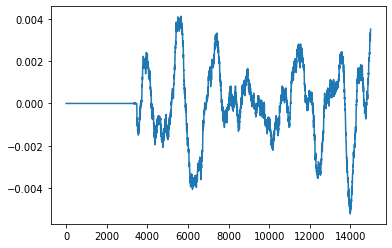

In [191]:
frames, frate = readwavefile("DS16b.wav")
plt.plot(frames[0:15000])
print(frate)